Imports

In [324]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt 
import math

Listes des coordonnées mondes des coins de nos arucos

In [325]:
taille_a = 16.3

aruco_ppm = [[[164,0,150],[164-taille_a,0,150],[164-taille_a,0,150-taille_a],[164,0,150-taille_a]],
             [[0,248,194],[0,248+taille_a,194],[0,248+taille_a,194-taille_a],[0,248,194-taille_a]],
             [[0,274,146],[0,274+taille_a,146],[0,274+taille_a,146-taille_a],[0,274,146-taille_a]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
             [[0,170,166],[0,170+taille_a,166],[0,170+taille_a,166-taille_a],[0,170,166-taille_a]],
             [[0,104,199],[0,104+taille_a,199],[0,104+taille_a,199-taille_a],[0,104,199-taille_a]],
             [[373,0,181],[356.7,0,181],[356.7,0,164.7],[373,0,164.7]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
             ]

Lecture image

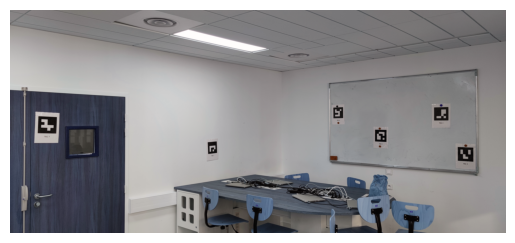

In [326]:
frame = cv2.imread('tags.jpg')
if frame is None:
    print("Erreur : Impossible de charger l'image.")
else:
    # Afficher l'image dans une fenêtre
    plt.imshow(frame)
    plt.axis('off')  # Ne pas afficher les axes
    plt.show()

Lecture aruco

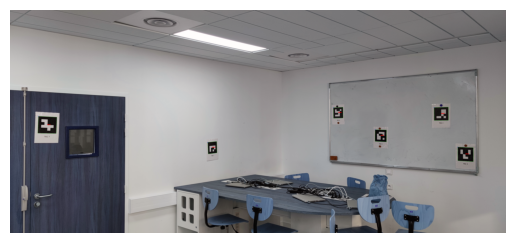

In [327]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_parameters = cv2.aruco.DetectorParameters()
aruco_detector = cv2.aruco.ArucoDetector(dictionary=aruco_dict, detectorParams=aruco_parameters)   
corners, ids, rejectedPoints = aruco_detector.detectMarkers(frame)
I_aruco = cv2.aruco.drawDetectedMarkers(frame,corners, ids)
plt.imshow(frame)
plt.axis('off')  # Ne pas afficher les axes
plt.show()

Création du dictionnaire

In [328]:
bibliotheque = {
    "tag": [],
    "c_mm": [],
    "c_ppx": []
    }
for i, id in enumerate(ids.flatten()):
    print("id detecte : ",id)
    bibliotheque["tag"].append(int(id))
    bibliotheque["c_mm"].append(aruco_ppm[int(id)-1])


    corners_list = corners[i][0]  # Récupère les coins du marqueur
    
    corners_list_compute = [corners_list[0].tolist(), # Haut gauche
                            corners_list[1].tolist(), # Haut droit
                            corners_list[2].tolist(), # Bas droit
                            corners_list[3].tolist()] # Bas gauche
    # Assigner les coins dans l'ordre, sans listes imbriquées
    bibliotheque["c_ppx"].append(corners_list_compute)  
    
for cle, value in bibliotheque.items() :
    print(cle," ",value)

id detecte :  7
id detecte :  3
id detecte :  2
id detecte :  5
id detecte :  1
id detecte :  6
tag   [7, 3, 2, 5, 1, 6]
c_mm   [[[373, 0, 181], [356.7, 0, 181], [356.7, 0, 164.7], [373, 0, 164.7]], [[0, 274, 146], [0, 290.3, 146], [0, 290.3, 129.7], [0, 274, 129.7]], [[0, 248, 194], [0, 264.3, 194], [0, 264.3, 177.7], [0, 248, 177.7]], [[0, 170, 166], [0, 186.3, 166], [0, 186.3, 149.7], [0, 170, 149.7]], [[164, 0, 150], [147.7, 0, 150], [147.7, 0, 133.7], [164, 0, 133.7]], [[0, 104, 199], [0, 120.3, 199], [0, 120.3, 182.7], [0, 104, 182.7]]]
c_ppx   [[[330.0, 1242.0], [544.0, 1252.0], [537.0, 1440.0], [323.0, 1437.0]], [[5200.0, 1598.0], [5379.0, 1605.0], [5379.0, 1765.0], [5200.0, 1755.0]], [[4925.0, 1140.0], [5090.0, 1135.0], [5091.0, 1288.0], [4926.0, 1289.0]], [[4240.0, 1397.0], [4371.0, 1400.0], [4371.0, 1537.0], [4239.0, 1530.0]], [[2296.0, 1543.0], [2400.0, 1533.0], [2403.0, 1664.0], [2301.0, 1677.0]], [[3755.0, 1142.0], [3866.0, 1136.0], [3868.0, 1261.0], [3757.0, 1264.0]]]


Parametres

In [329]:
largeur = 16.3
h,l,_ = frame.shape
i2,i1 = h/2,l/2
print("i1 : ",i1)
print("i2 : ",i2)
focal = 5.7
focal = 25/1000

# s1 = abs(bibliotheque['c_ppx'][0][0][0]-bibliotheque['c_ppx'][0][1][0])/largeur
# s2 = abs(bibliotheque['c_ppx'][0][0][1]-bibliotheque['c_ppx'][0][1][1])/largeur

N = len(ids)
U1 = np.zeros((N*4,1))
A = np.zeros((N*4,7))

nmb = 0

for i in range(N):
    for j in range(4):
        U1[nmb*4+j][0] = bibliotheque['c_ppx'][i][j][0]-i1

        A[nmb*4+j][0] = (bibliotheque['c_ppx'][i][j][1]-i2)*bibliotheque['c_mm'][i][j][0]
        A[nmb*4+j][1] = (bibliotheque['c_ppx'][i][j][1]-i2)*bibliotheque['c_mm'][i][j][1]
        A[nmb*4+j][2] = (bibliotheque['c_ppx'][i][j][1]-i2)*bibliotheque['c_mm'][i][j][2]

        A[nmb*4+j][3] = bibliotheque['c_ppx'][i][j][1]-i2

        A[nmb*4+j][4] = -(bibliotheque['c_ppx'][i][j][0]-i1)*bibliotheque['c_mm'][i][j][0]
        A[nmb*4+j][5] = -(bibliotheque['c_ppx'][i][j][0]-i1)*bibliotheque['c_mm'][i][j][1]
        A[nmb*4+j][6] = -(bibliotheque['c_ppx'][i][j][0]-i1)*bibliotheque['c_mm'][i][j][2]
    nmb+=1



i1 :  2880.0
i2 :  1296.0


Résolution de L

In [330]:
A_inv = np.linalg.pinv(A)
L = A_inv @ U1

print(L)


[[-3.78961334e-03]
 [ 3.96695713e-03]
 [-2.08300968e-04]
 [ 2.68204798e-01]
 [-4.77001100e-05]
 [-5.92817756e-05]
 [-5.55881298e-03]]


Résolution parametre

plt.imshow(im orginal)
plt.plot(coord pixel dim1, coord pixel dim2,'RX') cela va projeter de spoints rouge au coordonne fixé par dessus l'image

In [331]:
O2c = 1/math.sqrt(L[5-1]**2+L[6-1]**2+L[7-1]**2) # valeur sur l'axe 2 de l'origine du repère objet dans le repère monde

beta = O2c * math.sqrt(L[1-1]**2+L[2-1]**2+L[3-1]**2) 
O1c = L[4-1]*O2c/beta
r11 = L[1-1]*O2c/beta
r12 = L[2-1]*O2c/beta
r13 = L[3-1]*O2c/beta
r21 = L[5-1]*O2c
r22 = L[6-1]*O2c
r23 = L[7-1]*O2c


r31 = r12*r23-r13*r22
r32 = r21*r13-r23*r11
r33 = r11*r22-r12*r21

theta = -math.atan(r23/r33)
gamma = -math.atan(r12/r11)
omega = math.atan(r13/(-r23*np.sin(theta)+r33*np.cos(theta)))
print("beta : ",beta)
print("O2C : ",O2c)
print("O1C : ",O1c)

print('*'*50)
print("r11 : ",r11)
print("r12 : ",r12)
print("r13 : ",r13)

print('*'*50)
print("r21 : ",r21)
print("r22 : ",r22)
print("r23 : ",r23)

print('*'*50)
print("r31 : ",r31)
print("r32 : ",r32)
print("r33 : ",r33)
print('*'*50)
print("theta : ",theta)
print("gamma : ",gamma)
print("omega : ",omega)

O2C :  179.87767081165927
O1C :  [48.85235439]
**************************************************
r11 :  [-0.69026183]
r12 :  [0.72256424]
r13 :  [-0.03794113]
**************************************************
r21 :  [-0.00858018]
r22 :  [-0.01066347]
r23 :  [-0.99990633]
**************************************************
r31 :  [-0.72290114]
r32 :  [-0.68987163]
r33 :  [0.01356032]
**************************************************
theta :  1.5572355684634827
gamma :  0.8082578672833203
omega :  -0.037923003800274614


C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\1061531149.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  O2c = 1/math.sqrt(L[5-1]**2+L[6-1]**2+L[7-1]**2) # valeur sur l'axe 2 de l'origine du repère objet dans le repère monde
C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\1061531149.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta = O2c * math.sqrt(L[1-1]**2+L[2-1]**2+L[3-1]**2)
C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\1061531149.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performin

Résolution de O3c et f2

In [332]:
B = np.zeros((N*4,2))
R = np.zeros((N*4,1))

nmb = 0
for i in range(N):
    for j in range(4):
        B[nmb*4+j][0] =  bibliotheque['c_ppx'][i][j][1]-i2
        # print(bibliotheque['c_ppx'][i][j][1]-i2)
        B[nmb*4+j][1] =  -(r21*bibliotheque['c_mm'][i][j][0]+
                     r22*bibliotheque['c_mm'][i][j][1]+
                     r23*bibliotheque['c_mm'][i][j][2]+
                     O2c)
        
        R[nmb*4+j][0] = -(bibliotheque['c_ppx'][i][j][1]-i2)*(r31*bibliotheque['c_mm'][i][j][0]+
                                                            r32*bibliotheque['c_mm'][i][j][1]+
                                                            r33*bibliotheque['c_mm'][i][j][2])
        
    nmb+=1

        
[O3c,f2] = np.linalg.pinv(B) @ R
print("O3c : ",O3c)
print("f2 : ",f2)

f1 = beta*f2
s1 = focal/f1
s2 = focal/f2

print("f1 : ",f1)
print("s1 : ",s1)
print("s2 : ",s2)

O3c :  [632.74998071]
f2 :  [4345.94901125]
f1 :  [4291.83409447]
s1 :  [5.82501547e-06]
s2 :  [5.7524835e-06]


C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\102580789.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B[nmb*4+j][1] =  -(r21*bibliotheque['c_mm'][i][j][0]+
C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\102580789.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[nmb*4+j][0] = -(bibliotheque['c_ppx'][i][j][1]-i2)*(r31*bibliotheque['c_mm'][i][j][0]+


Projection ensemble coordonnées monde sur image acquise

In [333]:
Mint = np.zeros((3,4))
Mint[0][0] = focal/s1
Mint[0][2] = i1
Mint[1][1] = focal/s2
Mint[1][2] = i2
Mint[2][2] = 1

Mext = np.zeros((4,4))
Mext[0][0] = r11
Mext[0][1] = r12
Mext[0][2] = r13
Mext[0][3] = O1c

Mext[1][0] = r21
Mext[1][1] = r22
Mext[1][2] = r23
Mext[1][3] = O2c

Mext[2][0] = r31
Mext[2][1] = r32
Mext[2][2] = r33
Mext[2][3] = O3c

Mext[3][3] = 1

M = Mint @ Mext
print("M : ",M)


M :  [[-5.04444453e+03  1.11429555e+03 -1.23783310e+02  2.03198614e+06]
 [-9.74168925e+02 -9.40416519e+02 -4.32796776e+03  1.60178316e+06]
 [-7.22901142e-01 -6.89871629e-01  1.35603193e-02  6.32749981e+02]]


C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\603288980.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mint[0][0] = focal/s1
C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\603288980.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mint[1][1] = focal/s2
C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\603288980.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Mext[0][0] = r11
C:\Users\gaell\AppData\Local\Temp\ipykernel_28740\603288980.py:10: Depre

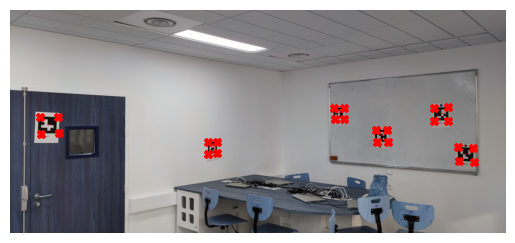

In [334]:
u0_calcul = []
u1_calcul = []
for i in range(N):
    for j in range(4):
        xO1 = bibliotheque['c_mm'][i][j][0] 
        xO2 = bibliotheque['c_mm'][i][j][1] 
        xO3 = bibliotheque['c_mm'][i][j][2] 
        alpha = r31*xO1 + r32*xO2 + r33*xO3 + O3c

        Uf = M @ [xO1,xO2,xO3,1]
        
        u0_calcul.append(Uf[0]/alpha)
        u1_calcul.append(Uf[1]/alpha)

plt.imshow(frame)
plt.plot(u0_calcul, u1_calcul, 'rX')  # Projeter des points rouges en croix aux coordonnées spécifiées
plt.axis('off')  # Ne pas afficher les axes
plt.show()




Coordonnées de la caméra dans le repère monde

In [335]:
# page 24 du cours 
O1c_scalar = O1c.item()  # Extrait la valeur scalaire
O3c_scalar = O3c.item()  # Extrait la valeur scalaire

# Définir R et T_origin
R = np.array([[r11, r12, r13],
              [r21, r22, r23],
              [r31, r32, r33]])

# Créer T_origin en utilisant des scalaires
T_origin = np.array([O1c_scalar, O2c, O3c_scalar])  # Tableau 1D


R_trans = R.T
Pcam_calcul = -np.dot(R_trans,T_origin)
print('Pcam : ',Pcam_calcul)

Pcam :  [[492.67998264 403.13541556 173.13404352]]


Utilisation de OpenCV

In [345]:
objectPoints_m = [np.array(points, dtype=np.float32) for points in bibliotheque['c_mm']]
imagePoints_m = [np.array(points, dtype=np.float32) for points in bibliotheque['c_ppx']]
#Taille de l'image
image_size = (frame.shape[1], frame.shape[0])
mtx_init = [[f1[0], 0, i1],
            [0, f2[0], i2],
            [0, 0, 1]]

# Convertir la matrice en numpy array
mtx_init = np.array(mtx_init, dtype=np.float32)

# Appeler la fonction de calibration de la caméra
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints=objectPoints_m, 
    imagePoints=imagePoints_m, 
    imageSize=image_size, 
    cameraMatrix=mtx_init, 
    distCoeffs=None,  
    flags=cv2.CALIB_USE_INTRINSIC_GUESS
)

# Afficher les résultats
print("Matrice de la caméra : \n", mtx)
print("Coefficients de distorsion : \n", dist)
print("Erreur de reprojection : ", ret)

Matrice de la caméra : 
 [[4.11754192e+03 0.00000000e+00 2.87529600e+03]
 [0.00000000e+00 4.20683063e+03 1.30973841e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Coefficients de distorsion : 
 [[ 0.15763632  0.13861992  0.00215151 -0.00559059 -0.65069021]]
Erreur de reprojection :  0.2545981555582478


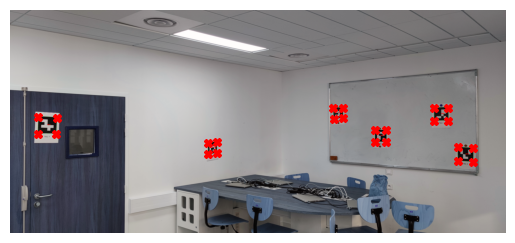

In [337]:
rvec = rvecs[0]
tvec = tvecs[0]

# Utiliser cv2.projectPoints pour projeter les points 3D sur l'image
u0_opencv = []
u1_opencv = []

# Boucler sur chaque ensemble de points 3D (objectPoints_m contient des listes de points 3D)
for i in range(len(objectPoints_m)):
    # Projeter les points 3D dans l'image en utilisant la matrice de caméra, rvecs et tvecs
    imagePoints_reproj, _ = cv2.projectPoints(
        np.array(objectPoints_m[i], dtype=np.float32),  # Points 3D à projeter
        rvecs[i],                                       # Vecteur de rotation correspondant
        tvecs[i],                                       # Vecteur de translation correspondant
        mtx,                                            # Matrice de la caméra
        dist                                            # Coefficients de distorsion
    )
    
    # Extraire les coordonnées u0 (x) et u1 (y) pour les points projetés
    u0_opencv.extend(imagePoints_reproj[:, 0, 0])  # Ajouter les coordonnées x
    u1_opencv.extend(imagePoints_reproj[:, 0, 1])  # Ajouter les coordonnées y

# Convertir u0 et u1 en tableaux NumPy pour faciliter l'affichage
u0_opencv = np.array(u0_opencv)
u1_opencv = np.array(u1_opencv)

# Afficher l'image avec matplotlib
plt.imshow(frame)  # Afficher l'image d'origine
plt.plot(u0_opencv, u1_opencv, 'rX')  # Tracer les points projetés en croix rouge (X)
plt.axis('off')  # Désactiver les axes pour une image plus propre
plt.show()

In [338]:
rvec = rvecs[0]  # Pour la première vue
tvec = tvecs[0]

rotation_matrix, _ = cv2.Rodrigues(rvec)
transformation_matrix = np.eye(4)
transformation_matrix[:3, :3] = rotation_matrix  # Remplir la partie rotation
transformation_matrix[:3, 3] = tvec.T

inverse_transformation = np.linalg.inv(transformation_matrix)

Pcam_opencv = inverse_transformation[:3, 3]

print("Pcam avec openCV ", Pcam_opencv)

Pcam avec openCV  [491.40247952 411.44334828 154.93415171]


Calcul des différences

In [346]:
u0_calcul = np.array(u0_calcul).flatten()
u1_calcul = np.array(u1_calcul).flatten()

 
erreur_u0 = u0_opencv - u0_calcul
erreur_u1 = u1_opencv - u1_calcul

moyenne_erreur_u0 = np.mean(erreur_u0)
moyenne_erreur_u1 = np.mean(erreur_u1)

variance_erreur_u0 = np.var(erreur_u0)
variance_erreur_u1 = np.var(erreur_u1)

print(f"Moyenne des erreurs en u0 (x) : {moyenne_erreur_u0}")
print(f"Variance des erreurs en u0 (x) : {variance_erreur_u0}")

print(f"Moyenne des erreurs en u1 (y) : {moyenne_erreur_u1}")
print(f"Variance des erreurs en u1 (y) : {variance_erreur_u1}")


Pcam_mesure = [498,385,171.5]

print("Différence de mesure entre Pcam_mesure et Pcam_calcul : ",abs(Pcam_mesure-Pcam_calcul))
print("Différence de mesure entre Pcam_mesure et Pcam_opencv : ",abs(Pcam_mesure-Pcam_opencv))
print("Différence de mesure entre Pcam_calcul et Pcam_opencv : ",abs(Pcam_calcul-Pcam_opencv))

Moyenne des erreurs en u0 (x) : -8.998748806945757
Variance des erreurs en u0 (x) : 88.78164615160559
Moyenne des erreurs en u1 (y) : 0.06636430515575853
Variance des erreurs en u1 (y) : 7.435011716729328
Différence de mesure entre Pcam_mesure et Pcam_calcul :  [[ 5.32001736 18.13541556  1.63404352]]
Différence de mesure entre Pcam_mesure et Pcam_opencv :  [ 6.59752048 26.44334828 16.56584829]
Différence de mesure entre Pcam_calcul et Pcam_opencv :  [[ 1.27750312  8.30793271 18.19989181]]
